<a href="https://colab.research.google.com/github/LuisPeMoraRod/AI-Laboratories/blob/main/Lab8_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para las siguientes funciones:

1.   $f_1(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$, \\
con $x_1, x_2 \in [-4, 4]$
2.   $f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$, \\
con $x_1, x_2 \in [-4, 4]$


### Ejercicio 1
Según tales funciones, grafique las funciones usando la función **meshgrid**.

In [102]:
# import libraries
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from typing import Callable
from sympy import *
import random

In [103]:
def plot_meshgrid(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.85)
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)


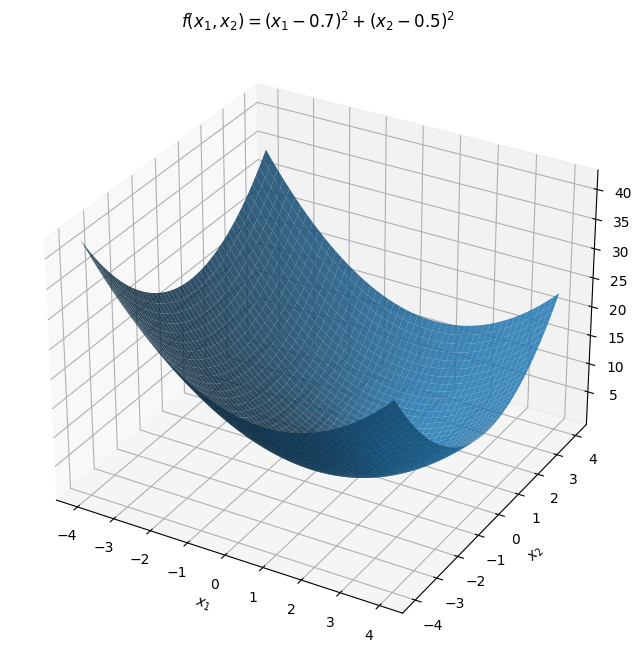

In [104]:
x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)

def f1_function(x1: np.ndarray, x2: np.ndarray):
  return (x1-0.7)**2 + (x2 - 0.5)**2

plot_meshgrid(f1_function, x1_range, x2_range, "$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$")


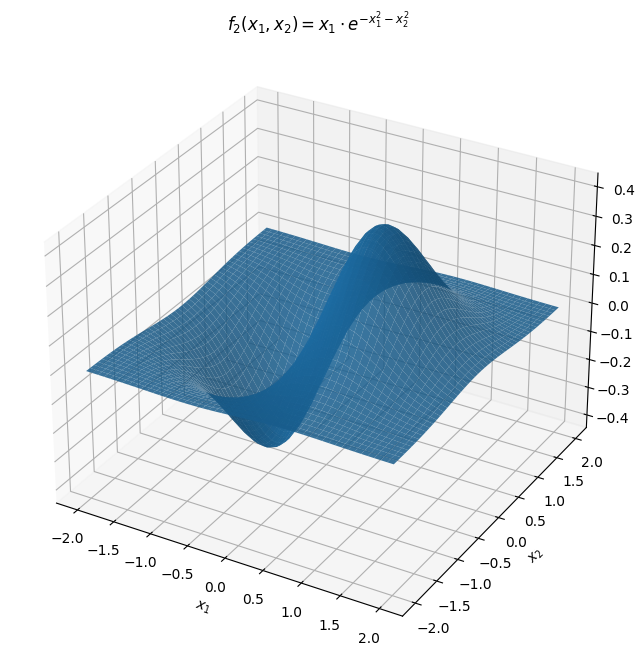

In [105]:
x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)

def f2_function(x1: np.ndarray, x2: np.ndarray):
  return x1 * np.exp(-x1**2 - x2**2)

plot_meshgrid(f2_function, x1_range, x2_range, "$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$")


### Ejercicio 2
Implemente el algoritmo del descenso del gradiente, para cada función.

a. Calcule paso a paso la derivada parcial.

1.   $\nabla f_1 = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}\\ 
\frac{\partial f_1}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
2x_1 - 1.4\\ 
2x_2 - 1
\end{bmatrix}$

$\frac{\partial f_1}{\partial x_1} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot \frac{\partial (x_1 - 0.7)}{\partial x_1}$ 

> $ \Rightarrow 2 \cdot (x_1 - 0.7) \cdot 1$ 

> $ \Rightarrow 2x_1 - 1.4$


$\frac{\partial f_1}{\partial x_2} = \frac{\partial \left[ (x_1 - 0.7)^2 + (x_2 - 0.5)^2 \right]}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot \frac{\partial (x_2 - 0.5)}{\partial x_2}$ 

> $ \Rightarrow 2 \cdot (x_2 - 0.5) \cdot 1$ 

> $ \Rightarrow 2x_2 - 1$

---

2.    $\nabla f_2 = 
\begin{bmatrix}
\frac{\partial f_2}{\partial x_1}\\ 
\frac{\partial f_2}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}\\ 
- 2 x_1 x_2 e^{-x_1^2 - x_2^2}
\end{bmatrix}$

$\frac{\partial f_2}{\partial x_1} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_1}$

> $ \Rightarrow \frac{\partial (x_1)}{\partial x_1} \cdot e^{-x_1^2 - x_2^2} + \frac{\partial \left (e^{-x_1^2 - x_2^2} \right )}{\partial x_1} \cdot x_1$ 

> $ \Rightarrow 1 \cdot e^{-x_1^2 - x_2^2} + -2 x_1 e^{-x_1^2 - x_2^2} \cdot x_1$

> $ \Rightarrow e^{-x_1^2 - x_2^2} - 2 x_1^2 e^{-x_1^2 - x_2^2}$

$\frac{\partial f_2}{\partial x_2} = \frac{\partial \left[ x_1 e^{-x_1^2 - x_2^2} \right]}{\partial x_2}$

> $ \Rightarrow x_1 e^{-x_1^2 - x_2^2} \cdot \frac{\partial \left( -x_1^2 - x_2^2 \right)}{\partial x_2}$

> $ \Rightarrow -2 x_1 x_2 e^{-x_1^2 - x_2^2}$

b. Escoja un coeficiente de aprendizaje 𝛼 que permita la convergencia y
reporte los datos y resultados para 100 corridas al menos


> i. Programe el algoritmo del descenso del gradiente para las funciones
dadas al inicio de este documento.

> ii. Indique la cantidad de iteraciones necesarias para converger, en
caso de hacerlo dentro de esas cien corridas.

> iii. Despliegue el punto de convergencia llegado, de igual forma
despliegue el punto al que se llegó en las iteraciones si no se pudo
converger

> iv. Reporte si convergió al punto correcto o no.

> v. Escoja una de las corridas y en una gráfica muestre los puntos
probados por el algoritmo. 



In [106]:
def get_parcial_derivate(f, var: str):
  """
  Computes partial derivate of a function in terms of given variables
  """
  x = symbols(var)
  return diff(f, x)

def get_gradient(f, variables : list):
  """
  Computes the gradient of a given function
  """
  partial_derivates = []
  for var in variables:
    df = get_parcial_derivate(f, str(var))
    partial_derivates.append(df)
  return partial_derivates

def eval_gradient(f_grad: list, variables: list, theta: list):
  """
  Evaluates gradient with current theta values
  """
  grad = []
  subs_theta = []
  for i in range(len(variables)):
    subs_theta.append((variables[i], theta[i]))
  
  for df in f_grad:
    df_theta = df.subs(subs_theta)
    grad.append(df_theta)
  return grad

def gradient_descent(f, variables: list, init: list, learn_rate = 0.1, iter_max = 100, tol = 0.0001):
  """
  Computes gradient descent algorithm
  """
  steps = [init] #history tracking
  theta = init #initial values

  f_gradient = get_gradient(f, variables) #calculate function gradients

  for _ in range(iter_max):
    prev_theta = theta 

    gradients = eval_gradient(f_gradient, variables, theta) #evaluate gradient with current theta

    theta = theta - learn_rate * np.array(gradients) #next theta 
    steps.append(theta)

    diff = theta - prev_theta
    diff = diff.astype(float)

    if norm(diff) < tol: 
      break

  return theta, steps

def plot_min_point(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x1_range: np.ndarray, x2_range: np.ndarray, point: list, title: str):
  x1, x2 = np.meshgrid(x1_range, x2_range)
  z = f(x1, x2)
  fig = plt.figure(figsize=(15, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, z, alpha=0.5)
  ax.scatter(point[0], point[1], point[2], c='red')
  ax.text(point[0] + 0.2, point[1], point[2], f'({point[0]}, {point[1]}, {point[2]})')
  ax.set_xlabel('$x_{1}$')
  ax.set_ylabel('$x_{2}$')
  ax.set_title(title)

def random_init(min, max):
  x1 = random.uniform(min,max)
  x2 = random.uniform(min,max)
  return [x1, x2]


f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2
Pasos requeridos para converger: 38
Punto al que se convergió: 
	x1 = 0.700 
	x2 = 0.500 
	f1(0.700, 0.500) = 0.0


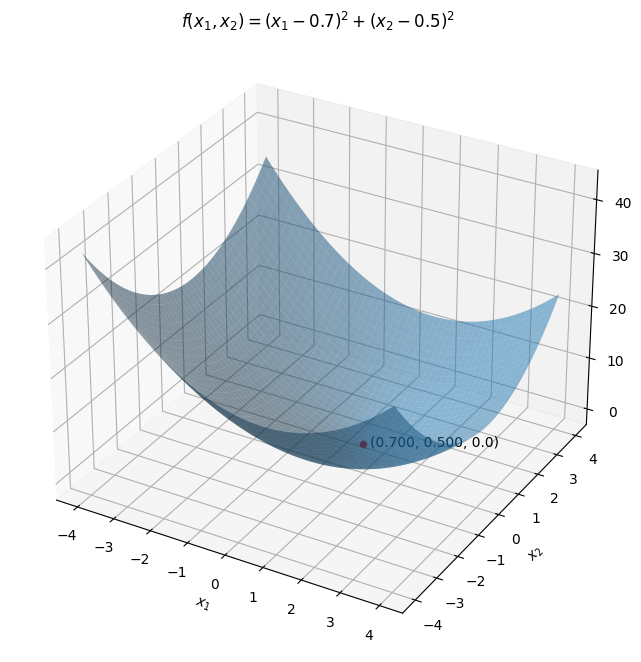

In [107]:
#Gradient descent for f1
dec = 3
x1, x2 = symbols('x1 x2')
f1 = (x1 - 0.7)**2 + (x2 - 0.5)**2
init_theta = random_init(-4,4)

theta_f1, steps_f1 = gradient_descent(f1, [x1, x2], init_theta)

t_x1 = round(theta_f1[0], dec)
t_x2 = round(theta_f1[1], dec)
t_z = f1.subs([(x1,theta_f1[0]),(x2, theta_f1[1])])
t_z = round(t_z, dec)

print(f'f1 = {f1}')
steps_num = len(steps_f1) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
x1_range = np.linspace(-4, 4)
x2_range = np.linspace(-4, 4)
plot_min_point(f1_function,x1_range, x2_range,[t_x1, t_x2, t_z] ,"$f(x_1, x_2) = (x_1 - 0.7)^2 + (x_2 - 0.5)^2$")



f2 = x1*exp(-x1**2 - x2**2)
Pasos requeridos para converger: 13
Punto al que se convergió: 
	x1 = -0.7071 
	x2 = 0.0001 
	f1(-0.7071, 0.0001) = -0.4289


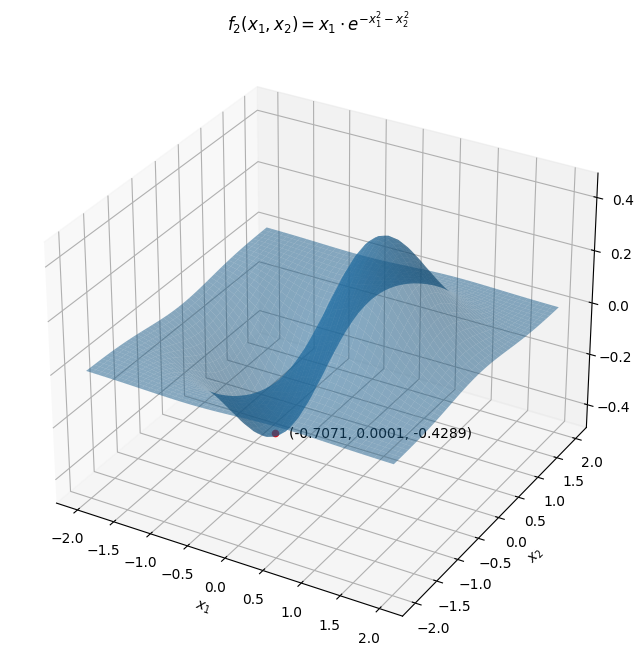

In [108]:
#Gradient descent for f2
dec = 4
x1, x2 = symbols('x1 x2')
f2 = x1 * exp(- (x1)**2 - (x2)**2)
init_theta = random_init(-2,2)

theta_f2, steps_f2 = gradient_descent(f2, [x1, x2], init_theta, tol=0.0001, learn_rate=0.5)

t_x1 = round(theta_f2[0], dec)
t_x2 = round(theta_f2[1], dec)
t_z = f2.subs([(x1,theta_f2[0]),(x2, theta_f2[1])])
t_z = round(t_z, dec)

print(f'\n\nf2 = {f2}')
steps_num = len(steps_f2) - 1
if (steps_num < 100):
  print(f'Pasos requeridos para converger: {steps_num}')
  print(f'Punto al que se convergió: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
else:
  print('El algoritmo no convergió')
  print(f'Último punto analizado: \n\tx1 = {t_x1} \n\tx2 = {t_x2} \n\tf1({t_x1}, {t_x2}) = {t_z}')
x1_range = np.linspace(-2, 2)
x2_range = np.linspace(-2, 2)
plot_min_point(f2_function,x1_range, x2_range,[t_x1, t_x2, t_z] ,"$f_2(x_1, x_2) = x_1 \cdot e^{-x_1^2 - x_2^2}$")
